<a href="https://colab.research.google.com/github/WendyNi98/STAT3612/blob/master/Project_Master_Branch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STAT3612 Final Project

Background Story

# Data Exploration

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [0]:
heloc = pd.read_csv('HelocData.csv')
heloc.head()

RiskFlag  x1   x2  x3   x4  x5  x6  x7   x8  x9  ...  x14  x15  x16  x17  \
0      Bad  75  169   2   59  21   0   0  100  -7  ...   36   -7    4    4   
1      Bad  66  502   4  145  34   0   0   97  36  ...   27    4    3    3   
2     Good  69  338   2   62  22   0   0   96  12  ...   35    0    4    4   
3     Good  75  422   1   91  55   0   0  100  -7  ...   33    0    4    4   
4      Bad  63  242   2   68  25   0   0  100  -7  ...   19   -7    3    3   

   x18  x19  x20  x21  x22  x23  
0   43  112    4    6    0   83  
1   80   53   17    3   12   83  
2   25  100    3    2    1   45  
3    2   11   12    2    1   57  
4   73   -8   12    1    5   87  

[5 rows x 24 columns]

In [0]:
data_dict = pd.read_excel('HelocDataDict2.xlsx', index_col=0)
var_names = data_dict['Description'].apply(
    lambda x: x.split('.')[0] if '.' in x else x)[1:] # Only extract the first sentence

#pd.options.display.max_colwidth = 100  # show complete variable names
var_names.to_frame()

Description
Variable Names                                                   
x1                           Consolidated version of risk markers
x2                                 Months Since Oldest Trade Open
x3                            Months Since Most Recent Trade Open
x4                                         Average Months in File
x5                                     Number Satisfactory Trades
x6                                         Number Trades 60+ Ever
x7                                         Number Trades 90+ Ever
x8                                Percent Trades Never Delinquent
x9                           Months Since Most Recent Delinquency
x10                        Max Delq/Public Records Last 12 Months
x11                                          Max Delinquency Ever
x12             Number of Total Trades (total number of credit...
x13                       Number of Trades Open in Last 12 Months
x14                                    Percent Installment Trades
x15                       Months Since Most Recent Inq excl 7days
x16                                   Number of Inq Last 6 Months
x17                        Number of Inq Last 6 Months excl 7days
x18                                 Net Fraction Revolving Burden
x19                               Net Fraction Installment Burden
x20                          Number Revolving Trades with Balance
x21                        Number Installment Trades with Balance
x22              Number Bank/Natl Trades w high utilization ratio
x23                                   Percent Trades with Balance

## Visualization
### Missing value information

In [0]:
#delete the records which are all empty
emptyRecords = heloc[heloc[heloc.isin([-7, -8, -9])].apply(lambda x: x.count(), axis=1) == 23].index
helocClean = heloc.drop(emptyRecords)
NotApplicable = (helocClean.isin([-7])).sum()/heloc.shape[0]
NoUsable = (helocClean.isin([-8])).sum()/heloc.shape[0]
NoRecord = (helocClean.isin([-9])).sum()/heloc.shape[0]
missingFrequency = pd.concat([NotApplicable, NoUsable, NoRecord], axis = 1)[1:]
print(missingFrequency)#.apply(lambda x: format(x, '.2%')))

            0         1         2
x1   0.000000  0.000000  0.000956
x2   0.000000  0.022851  0.000000
x3   0.000000  0.000000  0.000000
x4   0.000000  0.000000  0.000000
x5   0.000000  0.000000  0.000000
x6   0.000000  0.000000  0.000000
x7   0.000000  0.000000  0.000000
x8   0.000000  0.000000  0.000000
x9   0.445932  0.016828  0.000000
x10  0.000000  0.000000  0.000000
x11  0.000000  0.000000  0.000000
x12  0.000000  0.000000  0.000000
x13  0.000000  0.000000  0.000000
x14  0.000000  0.000000  0.000000
x15  0.177359  0.045511  0.000000
x16  0.000000  0.000000  0.000000
x17  0.000000  0.000000  0.000000
x18  0.000000  0.017784  0.000000
x19  0.000000  0.326895  0.000000
x20  0.000000  0.014915  0.000000
x21  0.000000  0.082321  0.000000
x22  0.000000  0.055741  0.000000
x23  0.000000  0.001721  0.000000


### Correlation information 
To drop some variables

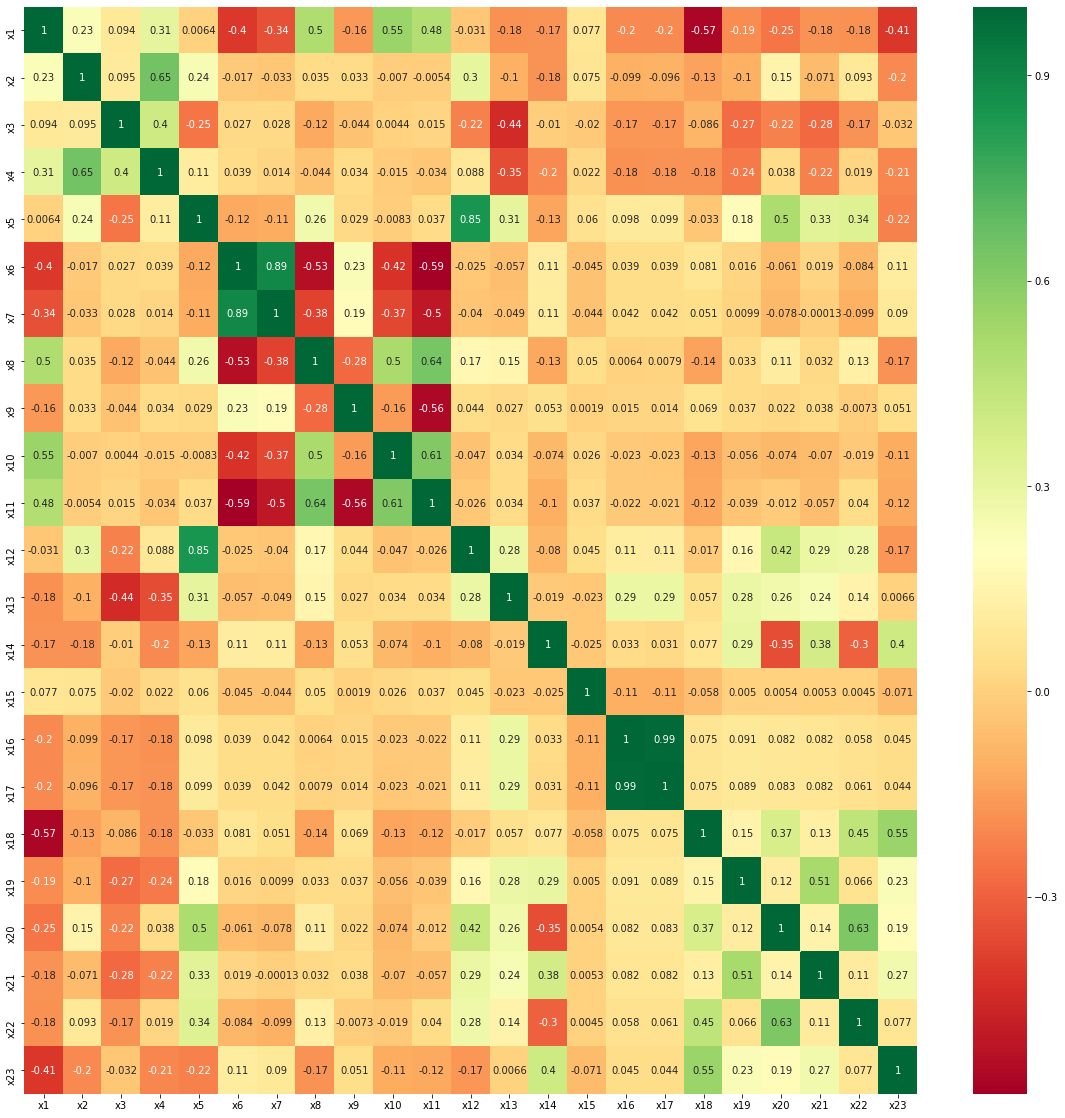

In [0]:
corrmat = helocClean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(helocClean[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Pairplot

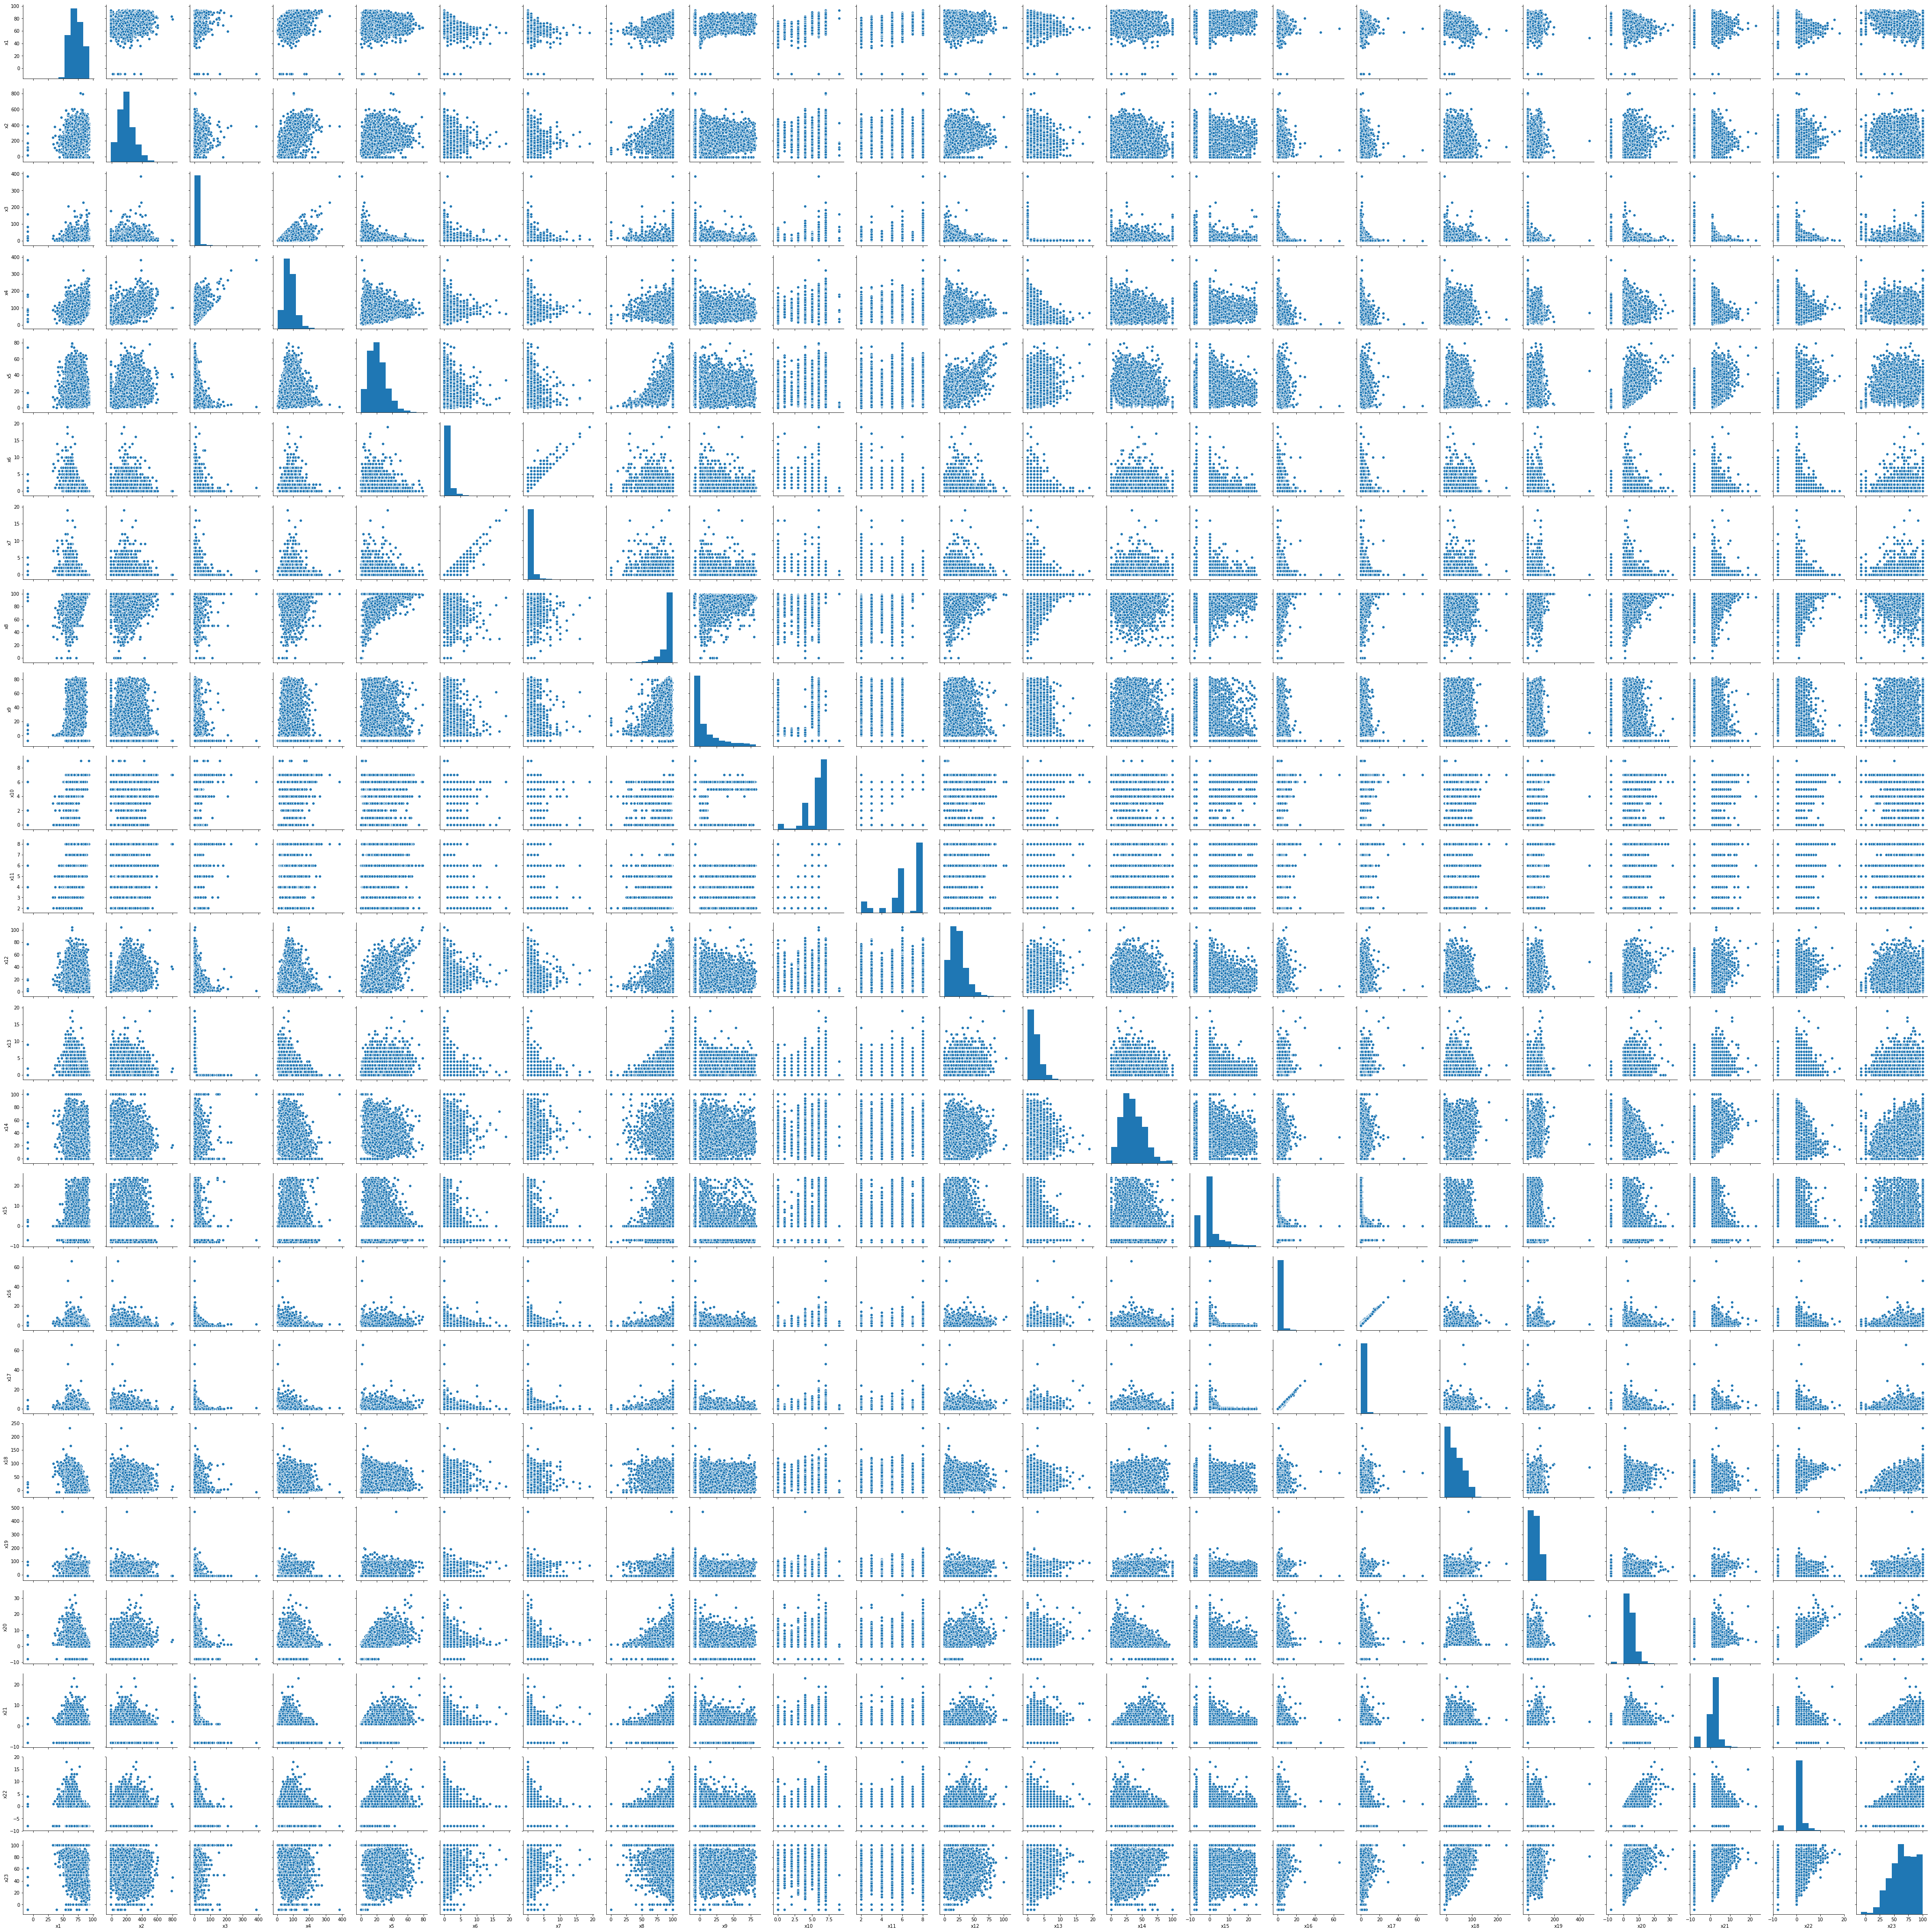

In [0]:
sns.pairplot(helocClean)

In [0]:
heloc.head(n=20)

RiskFlag  x1   x2  x3   x4  x5  x6  x7   x8  x9  ...  x14  x15  x16  x17  \
0       Bad  75  169   2   59  21   0   0  100  -7  ...   36   -7    4    4   
1       Bad  66  502   4  145  34   0   0   97  36  ...   27    4    3    3   
2      Good  69  338   2   62  22   0   0   96  12  ...   35    0    4    4   
3      Good  75  422   1   91  55   0   0  100  -7  ...   33    0    4    4   
4       Bad  63  242   2   68  25   0   0  100  -7  ...   19   -7    3    3   
5       Bad  74  193   1   91  19   0   0  100  -7  ...   18   -7    1    1   
6       Bad  58  247   2   62  30   0   0   94   1  ...   34    9    0    0   
7      Good  89  203   6   79  28   0   0   97  62  ...   53   20    0    0   
8      Good  89  357   1  125  15   0   0  100  -7  ...   39   -8    1    0   
9       Bad  63  240   4   64  20   1   0   86  45  ...   10    4    1    1   
10      Bad  -9   -9  -9   -9  -9  -9  -9   -9  -9  ...   -9   -9   -9   -9   
11     Good  -9   -9  -9   -9  -9  -9  -9   -9  -9  ...   -9   -9   -9   -9   
12      Bad  -9   -9  -9   -9  -9  -9  -9   -9  -9  ...   -9   -9   -9   -9   
13      Bad  -9   -9  -9   -9  -9  -9  -9   -9  -9  ...   -9   -9   -9   -9   
14      Bad  64  165  15   83   9   1   1  100  -7  ...   44    0    0    0   
15     Good  83  227  13   95  18   0   0  100  -7  ...   37    0    0    0   
16      Bad  65  267   0  101   5   1   1  100  -7  ...   57    0    2    2   
17      Bad  69   60  17   31  16   0   0  100  -7  ...   13    0    1    1   
18      Bad  58   92   7   34  11   0   0   92  50  ...   58    0    1    1   
19     Good  66  394   7  123  28   2   2   93   1  ...    0    0    1    1   

    x18  x19  x20  x21  x22  x23  
0    43  112    4    6    0   83  
1    80   53   17    3   12   83  
2    25  100    3    2    1   45  
3     2   11   12    2    1   57  
4    73   -8   12    1    5   87  
5    90   79    6    2    4   73  
6    62   70    5    2    2   89  
7     8   90    1    2    0   33  
8     6   31    4    2    0   55  
9    67   -8    6    1    3   70  
10   -9   -9   -9   -9   -9   -9  
11   -9   -9   -9   -9   -9   -9  
12   -9   -9   -9   -9   -9   -9  
13   -9   -9   -9   -9   -9   -9  
14   92   -8    3    1    1  100  
15   26   33    2    2    0   50  
16    0   92    0    2   -8   67  
17   76   -8    8    1    7   69  
18   70   78    2    3    1   83  
19   12   -8    6   -8    0   41  

[20 rows x 24 columns]

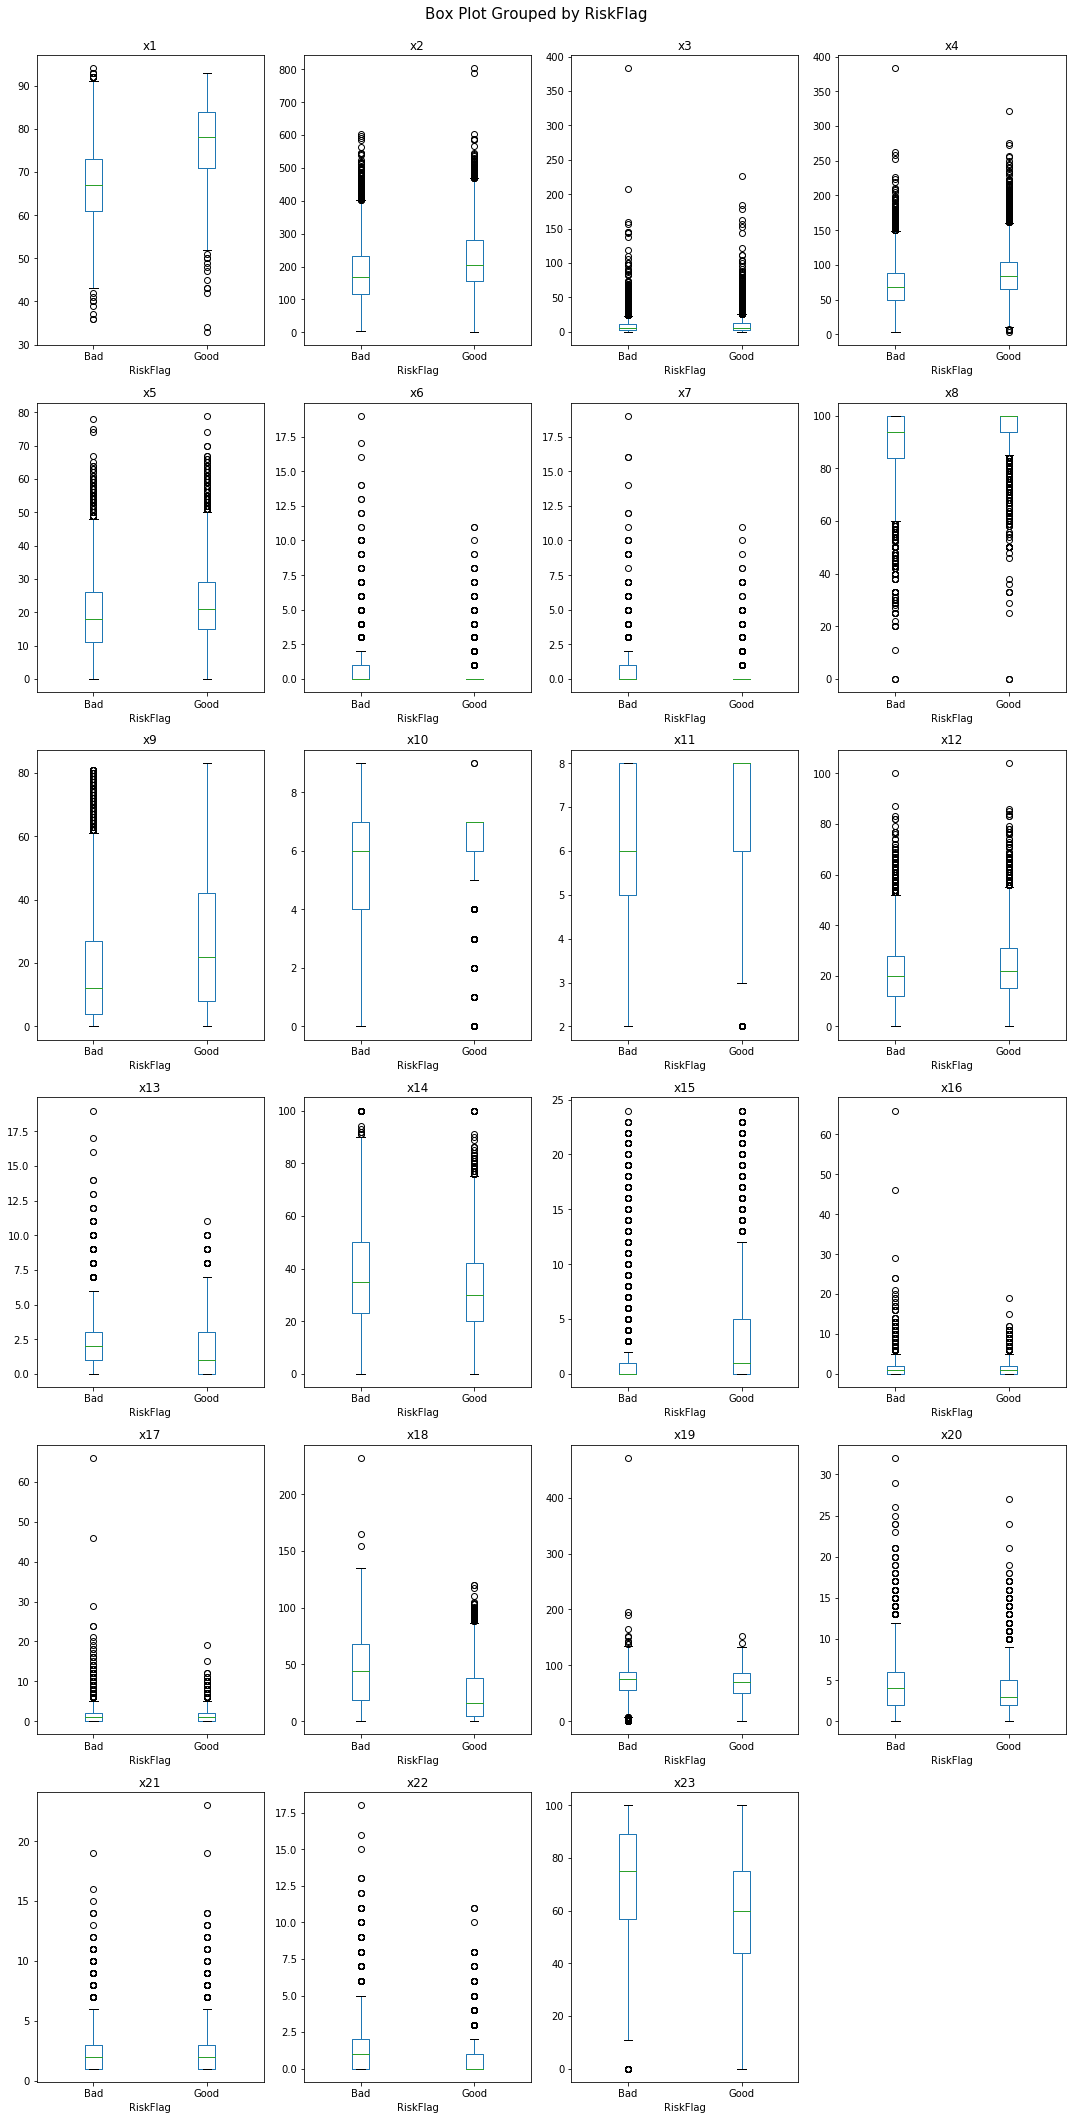

In [0]:
cols = 4 # change `clos` to get other layout
rows = (heloc.shape[1]-1)//cols + 1  # Floor division

# First figure: the boxplot with fliers
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
for i in range(rows):
    for j in range(cols):
        var_idx = cols*i+j+1
        try:
            helocClean[:].boxplot(column='x'+str(var_idx), by='RiskFlag',
                                      grid=False, ax=axes[i, j])
        except:
            axes[i, j].axis('off')  # make the remaining axes empty

plt.suptitle('Box Plot Grouped by RiskFlag', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Imputation

In [0]:
from sklearn.model_selection import train_test_split

X = heloc.drop(['RiskFlag'],axis=1)
X = X.drop('x19',axis=1) # too many missing values
y = heloc['RiskFlag'].copy()

emptyRecords = X[X[X.isin([-7, -8, -9])].apply(lambda x: x.count(), axis=1) == X.shape[1]].index
X.drop(emptyRecords,inplace=True)
y.drop(emptyRecords,inplace=True)

seed = np.random.seed(20190018)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [0]:
test_X.head()

In [0]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')
imp_frequent = SimpleImputer(strategy = 'most_frequent')
import sys
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

In [0]:
def impute7_train(X):
    # create new row for -7: no delinquincies/no inquiries
    X['x9na']=X['x9']==-7
    X['x15na']=X['x15']==-7
    X['x9na'] = X['x9na'].astype(int)
    X['x15na'] = X['x15na'].astype(int)
    
    # impute special values for -7 situation
    X.loc[X['x9']==-7,'x9']=999 #X['x9'].max() == 83 # subject to changes according to model types?
    X.loc[X['x15']==-7,'x15']=999 # X['x15'].max()= 24

In [0]:
def impute7_test(X):
    impute7_train(X)

In [0]:
def impute89_train(X,method='mean'):
    X.replace([-8, -9], np.nan, inplace=True)
    if method=='mean':
        imputed = imp_mean.fit_transform(X)
    if method=='median':
        imputed = imp_median.fit_transform(X)
    if method=='frequent':
        imputed = imp_frequent.fit_transform(X)
    if method=='fast_knn':
        imputed = fast_knn(X.values,k=30)
    if method=='mice':
        imputed= mice(X.values)
    imputed = pd.DataFrame(imputed)
    imputed.columns = X.columns
    imputed.index = X.index
    return imputed

In [0]:
def impute89_test(X,method='mean'):
    X.replace([-8, -9], np.nan, inplace=True)
    if method=='mean':
        imputed = imp_mean.transform(X)
    if method=='median':
        imputed = imp_median.transform(X)
    if method=='frequent':
        imputed = imp_frequent.transform(X)
    if method=='fast_knn':
        imputed = fast_knn(X.values,k=30)
    if method=='mice':
        imputed= mice(X.values)
    imputed = pd.DataFrame(imputed)
    imputed.columns = X.columns
    imputed.index = X.index
    return imputed

In [0]:
def preprocess_train_X(X,method):
    impute7_train(X)
    X = impute89_train(X,method=method)
    return X

In [0]:
def preprocess_test_X(X,method):
    impute7_test(X)
    X = impute89_test(X,method=method)
    return X

In [0]:
train_X = preprocess_train_X(train_X)
test_X = preprocess_test_X(test_X)

In [0]:
train_X.head()

x1     x2    x3     x4    x5   x6   x7     x8    x9  x10  ...  x16  \
7934  81.0  270.0   2.0   94.0  22.0  0.0  0.0  100.0  99.0  7.0  ...  1.0   
913   76.0  165.0   6.0   87.0  29.0  1.0  1.0   95.0  49.0  6.0  ...  0.0   
4160  82.0  252.0  51.0  191.0  13.0  0.0  0.0   77.0  21.0  6.0  ...  0.0   
81    56.0   68.0  41.0   53.0   1.0  4.0  4.0   75.0   4.0  4.0  ...  0.0   
5372  72.0  257.0   8.0   69.0  20.0  0.0  0.0  100.0  99.0  7.0  ...  0.0   

      x17        x18       x20  x21       x22    x23  empty  x9na  x15na  
7934  1.0   6.000000  4.000000  2.0  0.000000   78.0    0.0   1.0    1.0  
913   0.0  31.000000  4.000000  6.0  1.000000   71.0    0.0   0.0    0.0  
4160  0.0   4.000000  1.000000  1.0  0.000000   38.0    0.0   0.0    1.0  
81    0.0  34.991357  4.112611  1.0  1.107056  100.0    0.0   0.0    0.0  
5372  0.0  74.000000  3.000000  4.0  2.000000   88.0    0.0   1.0    0.0  

[5 rows x 25 columns]

In [0]:
train_y = train_y.replace({'Bad':1,'Good':0})
test_y = test_y.replace({'Bad':1,'Good':0})

In [0]:
# Models

### Logistic

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e8, solver='newton-cg')
logreg.fit(X_train_selected, Y_train)
print('Intercept:', *np.round(logreg.intercept_, 4), '\n'
      'Coefficients:', *np.round(np.squeeze(logreg.coef_), 4))

Intercept: -6.4311 
Coefficients: 0.0852 0.0018 0.0044 -0.0082 -0.0036


In [0]:
from sklearn.metrics import accuracy_score

y_pred_train = logreg.predict(X_train_selected)
y_pred_test = logreg.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.71859
The accuracy on the test set is: 0.71747


### GAM

In [0]:
from pygam import LogisticGAM, s
from sklearn.preprocessing import KBinsDiscretizer

X_train_selected_EFB = pd.DataFrame()      #create the empty dataframe to store the transformed training set
X_test_selected_EFB = pd.DataFrame()       #create the empty dataframe to store the transformed testing set
est_train = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
est_test = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
for feature in ['x1','x2','x4','x18','x23']:
    z_train = pd.DataFrame(est_train.fit_transform(X_train_selected[feature][:,np.newaxis]))
    z_test = pd.DataFrame(est_test.fit_transform(X_test_selected[feature][:,np.newaxis]))
    """
    print(feature)
    print(np.quantile(X[feature].values, np.linspace(0, 1, 6)))
    print("Bin Edges", est_train.bin_edges_[0])
    """
    X_train_selected_EFB[feature] = z_train[0]       #store the transformed training set
    X_test_selected_EFB[feature] = z_test[0]         #store the transformed testing set
    """
    print(x_EWB_train.loc[:5])              #preview of the transformed training set
    plt.figure(figsize=(4,3))
    x_train[feature].hist(grid=False,density=True)
    for x in est_train.bin_edges_[0]:
        plt.axvline(x,color='r')
        plt.title(feature ,fontsize=12)
    plt.show()
    """

gam = LogisticGAM().fit(X_train_selected_EFB, Y_train)
y_pred_train = gam.predict(X_train_selected_EFB)
y_pred_test = gam.predict(X_test_selected_EFB)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

C:\Users\15948\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\15948\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


The accuracy on the train set is: 0.72252
The accuracy on the test set is: 0.71747


In [0]:
n_splines = [10, 20, 30, 40, 50, 100]
spline_order = [1, 3, 5, 10, 20, 50]

for i in n_splines:
    for j in spline_order:
        if (i > j):
            
            p_spl = LogisticGAM(s(0, n_splines = i, spline_order = j, penalties = 'derivative') + s(1, n_splines = i, spline_order = j, penalties = 'derivative')
                        + s(2, n_splines = i, spline_order = j, penalties = 'derivative') + s(3, n_splines = i, spline_order = j, penalties='derivative')
                       + s(4, n_splines = i, spline_order = j, penalties='derivative') + s(5, n_splines = i, spline_order = j, penalties = 'derivative')
                           + s(6, n_splines = i, spline_order = j, penalties = 'derivative') + s(7, n_splines = i, spline_order = j, penalties = 'derivative')
                           + s(8, n_splines = i, spline_order = j, penalties = 'derivative') + s(9, n_splines = i, spline_order = j, penalties = 'derivative'))
            p_spl.gridsearch(X_train_selected.values, Y_train)
            y_pred_train = p_spl.predict(X_train_selected)
            y_pred_test = p_spl.predict(X_test_selected)
            print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
            print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73202
The accuracy on the test set is: 0.72709


100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73214
The accuracy on the test set is: 0.72658


100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73316
The accuracy on the test set is: 0.72911


100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73265
The accuracy on the test set is: 0.72962


100% (11 of 11) |########################| Elapsed Time: 0:00:09 Time:  0:00:09
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73189
The accuracy on the test set is: 0.72759


100% (11 of 11) |########################| Elapsed Time: 0:00:11 Time:  0:00:11
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73265
The accuracy on the test set is: 0.72759


  9% (1 of 11) |##                       | Elapsed Time: 0:00:16 ETA:   0:02:49

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:00:33 Time:  0:00:33
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73316
The accuracy on the test set is: 0.72911


100% (11 of 11) |########################| Elapsed Time: 0:00:15 Time:  0:00:15
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73202
The accuracy on the test set is: 0.72861


100% (11 of 11) |########################| Elapsed Time: 0:00:17 Time:  0:00:17
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73189
The accuracy on the test set is: 0.72658


100% (11 of 11) |########################| Elapsed Time: 0:00:19 Time:  0:00:19
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73189
The accuracy on the test set is: 0.72709


100% (11 of 11) |########################| Elapsed Time: 0:00:24 Time:  0:00:24
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73278
The accuracy on the test set is: 0.72962


100% (11 of 11) |########################| Elapsed Time: 0:00:36 Time:  0:00:36
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73265
The accuracy on the test set is: 0.72911


100% (11 of 11) |########################| Elapsed Time: 0:00:25 Time:  0:00:25
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73379
The accuracy on the test set is: 0.72962


100% (11 of 11) |########################| Elapsed Time: 0:00:26 Time:  0:00:26
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73392
The accuracy on the test set is: 0.72962


100% (11 of 11) |########################| Elapsed Time: 0:00:30 Time:  0:00:30
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73341
The accuracy on the test set is: 0.72861


100% (11 of 11) |########################| Elapsed Time: 0:00:36 Time:  0:00:36
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73151
The accuracy on the test set is: 0.72608


100% (11 of 11) |########################| Elapsed Time: 0:00:48 Time:  0:00:48
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73252
The accuracy on the test set is: 0.72962


C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
  9% (1 of 11) |##                       | Elapsed Time: 0:00:06 ETA:   0:01:03C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  

The accuracy on the train set is: 0.73544
The accuracy on the test set is: 0.73114


100% (11 of 11) |########################| Elapsed Time: 0:00:41 Time:  0:00:41
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73544
The accuracy on the test set is: 0.73114


100% (11 of 11) |########################| Elapsed Time: 0:00:46 Time:  0:00:46
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73493
The accuracy on the test set is: 0.73013


100% (11 of 11) |########################| Elapsed Time: 0:00:53 Time:  0:00:53
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.7343
The accuracy on the test set is: 0.72962


100% (11 of 11) |########################| Elapsed Time: 0:01:11 Time:  0:01:11
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

The accuracy on the train set is: 0.73138
The accuracy on the test set is: 0.72709


C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:28 ETA:   0:04:42C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered 

The accuracy on the train set is: 0.73835
The accuracy on the test set is: 0.72962


C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:29 ETA:   0:04:51C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered 

The accuracy on the train set is: 0.73784
The accuracy on the test set is: 0.72911


C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:32 ETA:   0:05:20C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered 

The accuracy on the train set is: 0.73759
The accuracy on the test set is: 0.7281


C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
100% (11 of 11) |#####################

The accuracy on the train set is: 0.73721
The accuracy on the test set is: 0.72759


C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:41 ETA:   0:06:56C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered 

The accuracy on the train set is: 0.7362
The accuracy on the test set is: 0.72759


C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  9% (1 of 11) |##                       | Elapsed Time: 0:01:02 ETA:   0:10:25C:\Users\15948\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\15948\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered 

The accuracy on the train set is: 0.7343
The accuracy on the test set is: 0.72962


### Neural Network

In [0]:
from sklearn.neural_network import MLPClassifier

max_iter = [100, 500, 1000, 2000, 5000]
random_state = [80, 100, 300, 500, 1000]
for i in max_iter:
    for j in random_state:
        clf = MLPClassifier(max_iter=i, random_state=j)
        clf.fit(X_train_selected, Y_train)
        y_pred_train = clf.predict(X_train_selected)
        y_pred_test = clf.predict(X_test_selected)
        print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
        print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.69795
The accuracy on the test set is: 0.69114
The accuracy on the train set is: 0.70618
The accuracy on the test set is: 0.69418
The accuracy on the train set is: 0.69301
The accuracy on the test set is: 0.69367
The accuracy on the train set is: 0.61993
The accuracy on the test set is: 0.63139
The accuracy on the train set is: 0.70453
The accuracy on the test set is: 0.69975
The accuracy on the train set is: 0.69795
The accuracy on the test set is: 0.69114
The accuracy on the train set is: 0.70618
The accuracy on the test set is: 0.69418
The accuracy on the train set is: 0.69301
The accuracy on the test set is: 0.69367
The accuracy on the train set is: 0.61993
The accuracy on the test set is: 0.63139
The accuracy on the train set is: 0.70453
The accuracy on the test set is: 0.69975
The accuracy on the train set is: 0.69795
The accuracy on the test set is: 0.69114
The accuracy on the train set is: 0.70618
The accuracy on the test set is: 0.69418
The 

In [0]:
from keras.models import Sequential
from keras.layers import Dense

seq = Sequential()
seq.add(Dense(15, input_dim=10, activation='relu'))
seq.add(Dense(8, activation='relu'))
seq.add(Dense(1, activation='sigmoid'))
seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
seq.fit(X_train_selected, Y_train, epochs=150, batch_size=10)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
7896/7896 [==============================] - 2s 199us/step - loss: 0.9356 - acc: 0.5483
Epoch 2/150
7896/7896 [==============================] - 1s 132us/step - loss: 0.6753 - acc: 0.5494
Epoch 3/150
7896/7896 [==============================] - 1s 126us/step - loss: 0.6530 - acc: 0.6222
Epoch 4/150
7896/7896 [==============================] - 1s 126us/step - loss: 0.6226 - acc: 0.6773
Epoch 5/150
7896/7896 [==============================] - 1s 128us/step - loss: 0.6124 - acc: 0.6744
Epoch 6/150
7896/7896 [==============================] - 1s 130us/step - loss: 0.6083 - acc: 0.6777
Epoch 7/150
7896/7896 [==============================] - 1s 125us/step - loss: 0.6057 - acc: 0.6802
Epoch 8/150
7896/7896 [==============================] - 1s 108us/step - loss: 0.6033 - acc: 0.6858
Epoch 9/150
7896/7896 [==============================] - 1s 104us/step - loss: 0

In [0]:
"""
y_pred_train = seq.predict(X_train_selected)
y_pred_test = seq.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))
"""

_, accuracy = seq.evaluate(X_train_selected, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

7896/7896 [==============================] - 0s 23us/step
Accuracy: 71.15


In [0]:
!pip install -U eli5
import eli5
from eli5.sklearn import PermutationImportance

# define a permutation importance object
perm = PermutationImportance(clf).fit(heloc_train_mean.iloc[:, 1:], heloc_train_mean['RiskFlag'])
# show the importance
eli5.show_weights(perm, feature_names=feature_names)

### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_selected, Y_train)
y_pred_train = dt.predict(X_train_selected)
y_pred_test = dt.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 1.0
The accuracy on the test set is: 0.62532


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_selected, Y_train)
y_pred_train = rf.predict(X_train_selected)
y_pred_test = rf.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

C:\Users\15948\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy on the train set is: 0.97974
The accuracy on the test set is: 0.67696


In [0]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']
# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth}
# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train_selected, Y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 28.7min finished


{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 300}


In [0]:
rf1 = RandomForestClassifier(n_estimators=5000, max_depth=300, max_features='auto')
rf1.fit(X_train_selected,Y_train)

y_pred_train = rf1.predict(X_train_selected)
y_pred_test = rf1.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 1.0
The accuracy on the test set is: 0.69772


In [0]:
rf1.fit(X_train_selected_EFB, Y_train)
y_pred_train = rf1.predict(X_train_selected_EFB)
y_pred_test = rf1.predict(X_test_selected_EFB)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.95061
The accuracy on the test set is: 0.67848


### SVM

In [0]:
def plot_decision_boundary(x, y, model):
    h = 0.01
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max() +0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max() +0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    cmap_light = col.ListedColormap(['#AAFFAA','#AAAAFF','#FFAAAA'])
    cmap_bold = col.ListedColormap(['#00FF00','#0000FF','#FF0000'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, 
                    edgecolor='k',cmap=cmap_bold)

In [0]:
from sklearn.svm import LinearSVC

linSVC = LinearSVC()
linSVC.fit(X_train_selected, Y_train)

y_pred_train = linSVC.predict(X_train_selected)
y_pred_test = linSVC.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.52267
The accuracy on the test set is: 0.51139


C:\Users\15948\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
linSVC.fit(X_train_selected_EFB, Y_train)
y_pred_train = linSVC.predict(X_train_selected_EFB)
y_pred_test = linSVC.predict(X_test_selected_EFB)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.71593
The accuracy on the test set is: 0.71899


C:\Users\15948\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
linSVC.fit(X_train_selected_relu, Y_train)
y_pred_train = linSVC.predict(X_train_selected_relu)
y_pred_test = linSVC.predict(X_test_selected_relu)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.69871
The accuracy on the test set is: 0.69924


C:\Users\15948\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
from sklearn.svm import SVC

# fit the model with RBF kernel
rbfSVC = SVC(gamma='auto')
rbfSVC.fit(X_train_selected, Y_train)

y_pred_train = rbfSVC.predict(X_train_selected)
y_pred_test = rbfSVC.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 1.0
The accuracy on the test set is: 0.5119


In [0]:
#SVC hyperparameter tuning
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['rbf'], 'gamma': np.logspace(-4,0,5),
                     'C': [1, 10, 100, 1000]}
clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train_selected, Y_train)
print('Best Parameters:',clf.best_params_)
y_pred_train = clf.predict(X_train_selected)
y_pred_test = clf.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

Best Parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
The accuracy on the train set is: 0.73252
The accuracy on the test set is: 0.72405


In [0]:
rbfSVC_best = SVC(gamma = 0.0001, C = 1)
rbfSVC_best.fit(X_train_selected_EFB, Y_train)
y_pred_train = rbfSVC_best.predict(X_train_selected_EFB)
y_pred_test = rbfSVC_best.predict(X_test_selected_EFB)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.71644
The accuracy on the test set is: 0.72051


In [0]:
#feature engineering

def PieceReLU(x, tau):
    xphi = x
    for k in range(len(tau)):
        tmp = [max(x1 - tau[k], 0) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    return xphi

def PieceLinearSpline(x, tau):
    xphi = [min(max(x1 - min(x), 0), tau[0] - min(x)) for x1 in x]
    for k in range(1, len(tau)):
        tmp = [min(max(x1 - tau[k - 1], 0), tau[k] - tau[k - 1]) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    xphi = np.column_stack((xphi, [min(max(x1 - tau[len(tau) - 1], 0), max(x) - tau[len(tau) - 1]) for x1 in x]))
    return xphi

In [0]:
k = 5
X_train_selected_relu = pd.DataFrame()     #create the empty dataframe to store the transformed training set
X_test_selected_relu = pd.DataFrame()      #create the empty dataframe to store the transformed testing set
for feature in ['x1','x2','x4','x18','x23']:
    tmp_train = pd.DataFrame(PieceReLU(X_train_selected[feature], np.linspace(X_train_selected[feature].min(), X_train_selected[feature].max(), k+2)[1:-1]))
    X_train_selected_relu = pd.concat([X_train_selected_relu, tmp_train], axis = 1)     #merge the transformed training data
    tmp_test = pd.DataFrame(PieceReLU(X_test_selected[feature], np.linspace(X_test_selected[feature].min(), X_test_selected[feature].max(), k+2)[1:-1]))
    X_test_selected_relu = pd.concat([X_test_selected_relu, tmp_test], axis = 1)        #merge the transformed testing data

In [0]:
rbfSVC_best = SVC(gamma = 0.0001, C = 1)
rbfSVC_best.fit(X_train_selected_relu, Y_train)
y_pred_train = rbfSVC_best.predict(X_train_selected_relu)
y_pred_test = rbfSVC_best.predict(X_test_selected_relu)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.7253
The accuracy on the test set is: 0.69772


### Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

tuned_parameters = {'n_estimators': [20, 30, 40, 50, 80, 100, 200, 300, 500, 1000, 2000, 3000, 5000], 
                    'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
                    'max_depth': [2, 3, 5]}
gb = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5,
                       scoring='accuracy')
gb.fit(X_train_selected, Y_train)
print('Best Parameters:',gb.best_params_)
y_pred_train = gb.predict(X_train_selected)
y_pred_test = gb.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))
"""
for n in n_list:
    gb = GradientBoostingClassifier(n_estimators=n, learning_rate = learning_rate, max_depth = max_depth)
    gb.fit(X_train_selected, Y_train)
    y_pred_train = gb.predict(X_train_selected)
    y_pred_test = clf.predict(X_test_selected)
    print(n)
    print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
    print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))
"""

Best Parameters: {'learning_rate': 0.075, 'max_depth': 5, 'n_estimators': 30}
The accuracy on the train set is: 0.76089
The accuracy on the test set is: 0.71392


"\nfor n in n_list:\n    gb = GradientBoostingClassifier(n_estimators=n, learning_rate = learning_rate, max_depth = max_depth)\n    gb.fit(X_train_selected, Y_train)\n    y_pred_train = gb.predict(X_train_selected)\n    y_pred_test = clf.predict(X_test_selected)\n    print(n)\n    print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))\n    print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))\n"

### Ensemble Learning

In [0]:
from sklearn.ensemble import VotingClassifier

ens1 = VotingClassifier(estimators=[('rbfSVC_best', rbfSVC_best), ('rf', rf), ('gam', gam)], voting='hard')
ens1.fit(X_train_selected, Y_train)
y_pred_train = ens1.predict(X_train_selected)
y_pred_test = ens1.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.84195
The accuracy on the test set is: 0.67342


In [0]:
from sklearn.ensemble import BaggingClassifier
#from sklearn import model_selection

num_trees = 100
ens2 = BaggingClassifier(base_estimator=rbfSVC_best, n_estimators=num_trees, random_state=7)
ens2.fit(X_train_selected, Y_train)
y_pred_train = ens2.predict(X_train_selected)
y_pred_test = ens2.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

The accuracy on the train set is: 0.72214
The accuracy on the test set is: 0.70987


In [0]:
num_trees = 100
ens2 = BaggingClassifier(base_estimator=logreg, n_estimators=num_trees, random_state=7)
ens2.fit(X_train_selected, Y_train)
y_pred_train = ens2.predict(X_train_selected)
y_pred_test = ens2.predict(X_test_selected)
print('The accuracy on the train set is: {}'.format(accuracy_score(Y_train, y_pred_train).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(Y_test, y_pred_test).round(5)))

C:\Users\15948\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\15948\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\15948\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\15948\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\15948\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\15948\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line se

The accuracy on the train set is: 0.7191
The accuracy on the test set is: 0.71747


## SVC

In [0]:
#SVC hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['rbf'], 'gamma': np.logspace(-4,0,5),
                     'C': [1, 10, 100, 1000]}
svc = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')
svc.fit(train_X, train_y)
print('Best Parameters:',svc.best_params_)
y_pred_train = svc.predict(train_X)
y_pred_test = svc.predict(test_X)
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, train_pred).round(5)))

Didn't run in this window. test accuracy  ~=0.705

## Random forest - Overfit

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_X, train_y)
train_pred = rf.predict(train_X)
test_pred = rf.predict(test_X)

C:\Users\malup\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

The accuracy on the train set is: 0.95889
The accuracy on the test set is: 0.67543


In [0]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']
# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth}
# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(train_X, train_y)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.9min finished


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 260}


In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_features='auto',max_depth=260)
rf.fit(train_X, train_y)
train_pred = rf.predict(train_X)
test_pred = rf.predict(test_X)

In [0]:
accuracy_score(train_y, train_pred)

0.9750209155013745

In [0]:
accuracy_score(test_y, test_pred)

0.7002868068833652

## XGBoost

In [0]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(train_X, train_y)

C:\Users\malup\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\malup\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:41:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
threshold = 0.5
train_pred = xgb.predict(train_X)>=threshold
test_pred = xgb.predict(test_X)>=threshold
print('The accuracy on the train set is: {}'.format(accuracy_score(train_y, train_pred).round(5)))
print('The accuracy on the test set is: {}'.format(accuracy_score(test_y, test_pred).round(5)))

The accuracy on the train set is: 0.74638
The accuracy on the test set is: 0.71128


# Neural network
Need dropout layer, or will seriously overfit...

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn = Sequential()
model_nn.add(Dense(50, activation='relu', input_dim=train_X.shape[1]))
model_nn.add(Dense(50, activation='relu'))
model_nn.add(Dense(1,activation='sigmoid'))
          
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model_nn.fit(train_X, train_y, epochs=150, batch_size=10)

Train on 8367 samples
Epoch 1/150
8367/8367 [==============================] - 1s 106us/sample - loss: 0.8522 - accuracy: 0.6375
Epoch 2/150
8367/8367 [==============================] - 1s 97us/sample - loss: 0.7162 - accuracy: 0.6564
Epoch 3/150
8367/8367 [==============================] - 1s 100us/sample - loss: 0.6946 - accuracy: 0.6704
Epoch 4/150
8367/8367 [==============================] - 1s 97us/sample - loss: 0.6540 - accuracy: 0.6708
Epoch 5/150
8367/8367 [==============================] - 1s 93us/sample - loss: 0.6481 - accuracy: 0.6695
Epoch 6/150
8367/8367 [==============================] - 1s 96us/sample - loss: 0.6320 - accuracy: 0.6785
Epoch 7/150
8367/8367 [==============================] - 1s 99us/sample - loss: 0.6282 - accuracy: 0.6821
Epoch 8/150
8367/8367 [==============================] - 1s 98us/sample - loss: 0.6299 - accuracy: 0.6779
Epoch 9/150
8367/8367 [==============================] - 1s 95us/sample - loss: 0.6042 - accuracy: 0.6888
Epoch 10/150
8367/8367

8367/8367 [==============================] - 1s 114us/sample - loss: 0.4932 - accuracy: 0.7569


In [0]:
accuracy = model_nn.evaluate(test_X, test_y)

2092/2092 [==============================] - 0s 19us/sample - loss: 0.6654 - accuracy: 0.7060


In [0]:
model_nn2 = Sequential()
model_nn2.add(Dense(15, activation='relu', input_dim=train_X.shape[1]))
model_nn2.add(Dense(8, activation='relu'))
model_nn2.add(Dense(1,activation='sigmoid'))
         
model_nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model_nn2.fit(train_X,train_y,epochs=150, batch_size=10)

Train on 8367 samples
Epoch 1/150
8367/8367 [==============================] - 1s 77us/sample - loss: 1.1519 - accuracy: 0.5988
Epoch 2/150
8367/8367 [==============================] - 1s 74us/sample - loss: 0.6214 - accuracy: 0.6796
Epoch 3/150
8367/8367 [==============================] - 1s 74us/sample - loss: 0.6073 - accuracy: 0.6918
Epoch 4/150
8367/8367 [==============================] - 1s 68us/sample - loss: 0.5929 - accuracy: 0.6955
Epoch 5/150
8367/8367 [==============================] - 1s 73us/sample - loss: 0.5904 - accuracy: 0.6976
Epoch 6/150
8367/8367 [==============================] - 1s 68us/sample - loss: 0.5786 - accuracy: 0.7072
Epoch 7/150
8367/8367 [==============================] - 1s 84us/sample - loss: 0.5780 - accuracy: 0.7055
Epoch 8/150
8367/8367 [==============================] - 1s 88us/sample - loss: 0.5760 - accuracy: 0.7050
Epoch 9/150
8367/8367 [==============================] - 1s 75us/sample - loss: 0.5703 - accuracy: 0.7062
Epoch 10/150
8367/8367 [

In [0]:
accuracy = model_nn2.evaluate(test_X, test_y)

2092/2092 [==============================] - 0s 20us/sample - loss: 0.5768 - accuracy: 0.7008


In [0]:
model_nn2 = Sequential()
model_nn2.add(Dense(30, activation='relu', input_dim=train_X.shape[1]))
model_nn2.add(Dense(100, activation='relu'))
model_nn2.add(Dense(100, activation='relu'))
model_nn2.add(Dense(100, activation='relu'))
model_nn2.add(Dense(1,activation='sigmoid'))
model_nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model_nn2.fit(train_X, train_y, epochs=50, batch_size=100)

Train on 8367 samples
Epoch 1/50
8367/8367 [==============================] - 0s 30us/sample - loss: 1.0053 - accuracy: 0.6487
Epoch 2/50
8367/8367 [==============================] - 0s 22us/sample - loss: 0.6177 - accuracy: 0.6797
Epoch 3/50
8367/8367 [==============================] - 0s 23us/sample - loss: 0.6215 - accuracy: 0.6786
Epoch 4/50
8367/8367 [==============================] - 0s 22us/sample - loss: 0.5986 - accuracy: 0.6944
Epoch 5/50
8367/8367 [==============================] - 0s 24us/sample - loss: 0.5804 - accuracy: 0.6986
Epoch 6/50
8367/8367 [==============================] - 0s 24us/sample - loss: 0.5875 - accuracy: 0.7003
Epoch 7/50
8367/8367 [==============================] - 0s 23us/sample - loss: 0.5781 - accuracy: 0.6993
Epoch 8/50
8367/8367 [==============================] - 0s 23us/sample - loss: 0.5866 - accuracy: 0.6948
Epoch 9/50
8367/8367 [==============================] - 0s 21us/sample - loss: 0.5799 - accuracy: 0.7011
Epoch 10/50
8367/8367 [==========

In [0]:
accuracy = model_nn2.evaluate(test_X, test_y)

2092/2092 [==============================] - 0s 26us/sample - loss: 0.6050 - accuracy: 0.6797


In [0]:
from tensorflow.keras.layers import Dropout
model_nn3 = Sequential()
model_nn3.add(Dense(30, activation='relu', input_dim=train_X.shape[1]))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(100, activation='relu'))
model_nn3.add(Dropout(0.3))
model_nn3.add(Dense(100, activation='relu'))
model_nn3.add(Dense(1,activation='sigmoid'))
         
model_nn3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model_nn3.fit(train_X, train_y, epochs=300, batch_size=100)

Train on 8367 samples
Epoch 1/300
8367/8367 [==============================] - 0s 34us/sample - loss: 2.2387 - accuracy: 0.5368
Epoch 2/300
8367/8367 [==============================] - 0s 24us/sample - loss: 0.9549 - accuracy: 0.5714
Epoch 3/300
8367/8367 [==============================] - 0s 24us/sample - loss: 0.8007 - accuracy: 0.5856
Epoch 4/300
8367/8367 [==============================] - 0s 24us/sample - loss: 0.7359 - accuracy: 0.6003
Epoch 5/300
8367/8367 [==============================] - 0s 26us/sample - loss: 0.6859 - accuracy: 0.6260
Epoch 6/300
8367/8367 [==============================] - 0s 23us/sample - loss: 0.6600 - accuracy: 0.6309
Epoch 7/300
8367/8367 [==============================] - 0s 25us/sample - loss: 0.6566 - accuracy: 0.6407
Epoch 8/300
8367/8367 [==============================] - 0s 24us/sample - loss: 0.6401 - accuracy: 0.6538
Epoch 9/300
8367/8367 [==============================] - 0s 23us/sample - loss: 0.6261 - accuracy: 0.6607
Epoch 10/300
8367/8367 [

8367/8367 [==============================] - 0s 24us/sample - loss: 0.5515 - accuracy: 0.7155
Epoch 152/300
8367/8367 [==============================] - 0s 25us/sample - loss: 0.5493 - accuracy: 0.7225
Epoch 153/300
8367/8367 [==============================] - 0s 25us/sample - loss: 0.5479 - accuracy: 0.7194
Epoch 154/300
8367/8367 [==============================] - 0s 24us/sample - loss: 0.5488 - accuracy: 0.7215
Epoch 155/300
8367/8367 [==============================] - 0s 23us/sample - loss: 0.5491 - accuracy: 0.7159
Epoch 156/300
8367/8367 [==============================] - 0s 25us/sample - loss: 0.5492 - accuracy: 0.7189
Epoch 157/300
8367/8367 [==============================] - 0s 26us/sample - loss: 0.5498 - accuracy: 0.7155
Epoch 158/300
8367/8367 [==============================] - 0s 26us/sample - loss: 0.5436 - accuracy: 0.7206
Epoch 159/300
8367/8367 [==============================] - 0s 27us/sample - loss: 0.5488 - accuracy: 0.7179
Epoch 160/300
8367/8367 [=================

In [0]:
accuracy = model_nn3.evaluate(test_X, test_y)

2092/2092 [==============================] - 0s 33us/sample - loss: 0.5864 - accuracy: 0.7008


# Post-hoc

## Variable Importance

In [0]:
# define a permutation importance object
perm = PermutationImportance(model).fit(test_X, test_y)
# show the importance
eli5.show_weights(perm, feature_names=features)

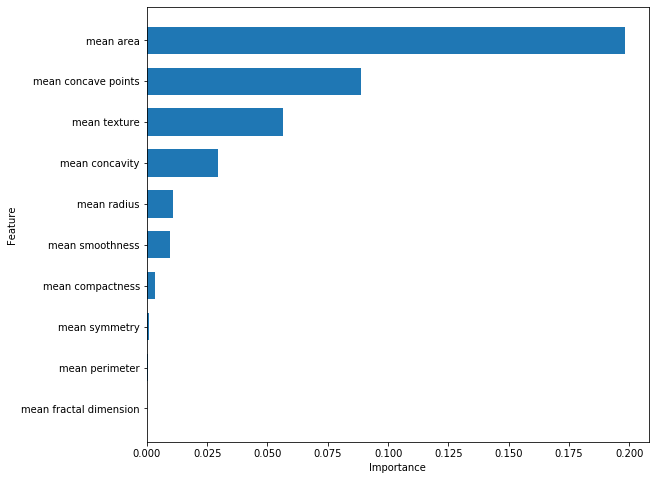

In [0]:
# importance in decreasing order
imp_ord = np.argsort(perm.feature_importances_)

plt.figure(figsize=(9,8))
yaxis = np.arange(len(perm.feature_importances_))*1.2
plt.barh(y = yaxis,width = perm.feature_importances_[imp_ord])
plt.yticks(yaxis,features[imp_ord])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

We can see from the above plots of variable importance that the features that have the greatest influence on the result of the prediction in the selected model is the mean area(with VI around 0.2), followed by mean concave points and mean texture.

## Partial Dependence Plot

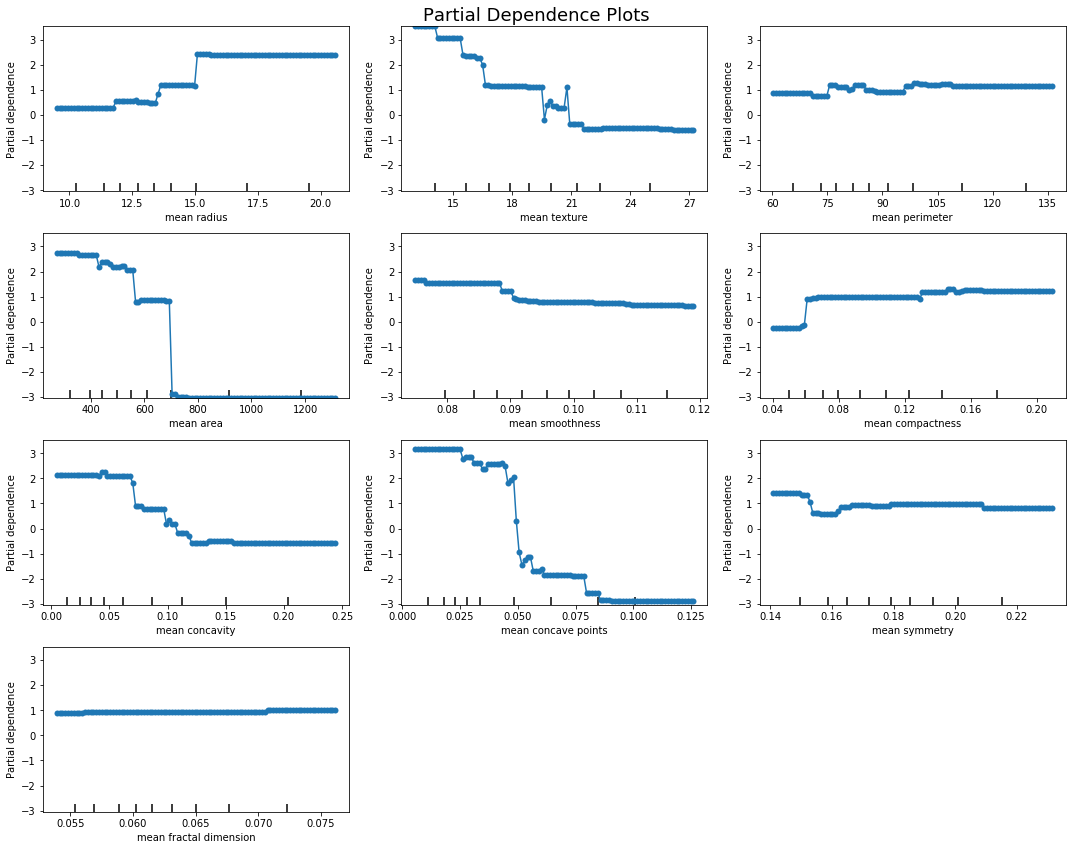

In [0]:
from sklearn.inspection import plot_partial_dependence as pdp
n_cols = 3
n_rows = features.shape[0]//n_cols + 1

fig = plt.figure(figsize=(15, 3*n_rows))
pdp(model, test_X, features=features, feature_names=features,
    n_cols=n_cols, fig=fig, line_kw={'marker': 'o', 'markeredgecolor': 'None'})

plt.suptitle('Partial Dependence Plots', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])

The partial dependence plots show that the mean texture, mean area, mean concavity and mean concave points have clear negative correlations with the possibility of the breast cancer cells being benign, while mean radius has a positive correlation.

## SHAP

In [0]:
import shap
shap.initjs()
# define the explainer
explainer = shap.TreeExplainer(model)
# calculate the shape value
shap_values = explainer.shap_values(test_X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


### Force Plot

### Local Interpretability

In [0]:
i = 3
# force plot
shap.force_plot(explainer.expected_value, shap_values[i,:], test_X[i],feature_names=features)

A sample from the dataset shows how the model works: mean area and mean perimeter contribute to the malignant side with great importance, while mean concave points and mean concavity contribute to the benign side with great importance. The predicted result of the model is malignant.

In [0]:
shap.force_plot(explainer.expected_value, shap_values, test_X,feature_names=features)

### Summary Plots

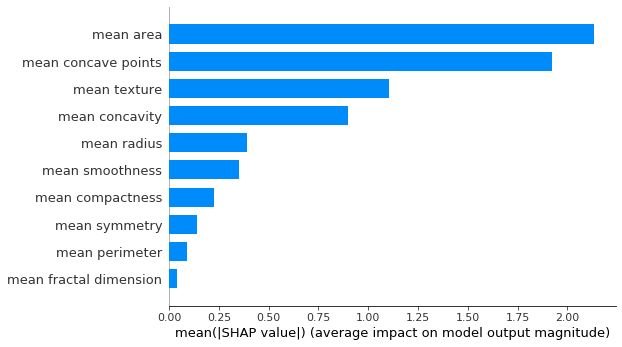

In [0]:
shap.summary_plot(shap_values, feature_names=features, plot_type='bar')

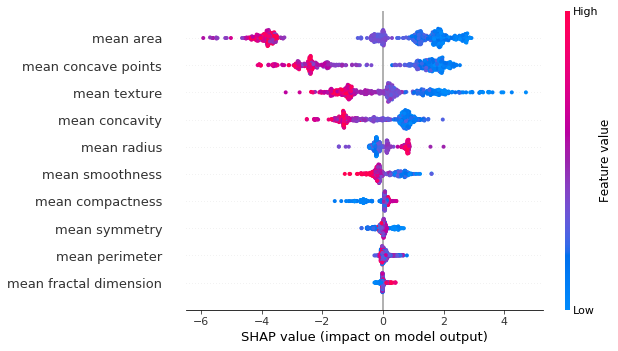

In [0]:
shap.summary_plot(shap_values, test_X,feature_names=features)

## InterpretML

In [0]:
from interpret.perf import RegressionPerf
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

blackbox_perf = RegressionPerf(model.predict).explain_perf(test_X, test_y, name='Gradient Boosting')
iplot(blackbox_perf.visualize())

The plot above shows that the model fits the training set very well with $R^2 = 1$ .